In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


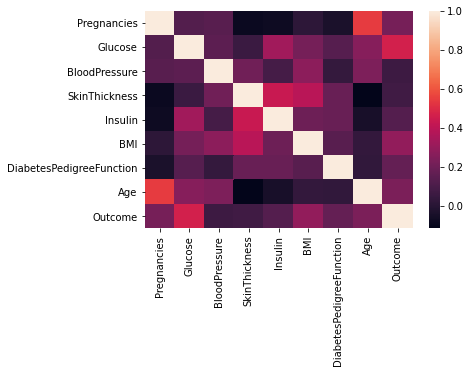

In [10]:
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [11]:
dfTrain = df[:650]
dfTest = df[650:750]
dfCheck = df[750:]

In [12]:
dfTest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
650,1,91,54,25,100,25.2,0.234,23,0
651,1,117,60,23,106,33.8,0.466,27,0
652,5,123,74,40,77,34.1,0.269,28,0
653,2,120,54,0,0,26.8,0.455,27,0
654,1,106,70,28,135,34.2,0.142,22,0
...,...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46,0
746,1,147,94,41,0,49.3,0.358,27,1
747,1,81,74,41,57,46.3,1.096,32,0
748,3,187,70,22,200,36.4,0.408,36,1


In [13]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [14]:
testData

array([[1.000e+00, 9.100e+01, 5.400e+01, 2.500e+01, 1.000e+02, 2.520e+01,
        2.340e-01, 2.300e+01],
       [1.000e+00, 1.170e+02, 6.000e+01, 2.300e+01, 1.060e+02, 3.380e+01,
        4.660e-01, 2.700e+01],
       [5.000e+00, 1.230e+02, 7.400e+01, 4.000e+01, 7.700e+01, 3.410e+01,
        2.690e-01, 2.800e+01],
       [2.000e+00, 1.200e+02, 5.400e+01, 0.000e+00, 0.000e+00, 2.680e+01,
        4.550e-01, 2.700e+01],
       [1.000e+00, 1.060e+02, 7.000e+01, 2.800e+01, 1.350e+02, 3.420e+01,
        1.420e-01, 2.200e+01],
       [2.000e+00, 1.550e+02, 5.200e+01, 2.700e+01, 5.400e+02, 3.870e+01,
        2.400e-01, 2.500e+01],
       [2.000e+00, 1.010e+02, 5.800e+01, 3.500e+01, 9.000e+01, 2.180e+01,
        1.550e-01, 2.200e+01],
       [1.000e+00, 1.200e+02, 8.000e+01, 4.800e+01, 2.000e+02, 3.890e+01,
        1.162e+00, 4.100e+01],
       [1.100e+01, 1.270e+02, 1.060e+02, 0.000e+00, 0.000e+00, 3.900e+01,
        1.900e-01, 5.100e+01],
       [3.000e+00, 8.000e+01, 8.200e+01, 3.100e+01, 7.0

In [15]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

In [16]:
means

array([  3.79846154, 120.20769231,  68.60923077,  20.33538462,
        79.07384615,  31.81738462,   0.47851538,  33.04461538])

In [17]:
stds

array([  3.3555003 ,  32.33633254,  19.59178574,  15.95845019,
       115.32512206,   7.87238538,   0.33924051,  11.65541843])

In [18]:
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [19]:
trainData

array([[ 0.65609843,  0.85947618,  0.17307096, ...,  0.22643904,
         0.43769718,  1.45472123],
       [-0.83399234, -1.0887967 , -0.13317983, ..., -0.66274507,
        -0.3758849 , -0.17542188],
       [ 1.25213473,  1.94185001, -0.23526343, ..., -1.08193187,
         0.57034643, -0.08962487],
       ...,
       [-1.13201049,  1.81815014, -0.94984863, ...,  0.75994951,
        -0.06931774, -0.94759493],
       [ 2.14618919,  0.48837659,  0.78557256, ..., -0.44680036,
        -0.64413116,  0.76834518],
       [-1.13201049, -0.40844744, -0.43943063, ..., -0.68815033,
        -1.01849683, -0.86179792]])

In [20]:
testData

array([[-8.33992338e-01, -9.03246906e-01, -7.45681428e-01,
         2.92297518e-01,  1.81453559e-01, -8.40581894e-01,
        -7.20772954e-01, -8.61797922e-01],
       [-8.33992338e-01, -9.91977771e-02, -4.39430631e-01,
         1.66972065e-01,  2.33480385e-01,  2.51844300e-01,
        -3.68923647e-02, -5.18609900e-01],
       [ 3.58080273e-01,  8.63520218e-02,  2.75154562e-01,
         1.23223842e+00, -1.79826053e-02,  2.89952190e-01,
        -6.17601314e-01, -4.32812894e-01],
       [-5.35974185e-01, -6.42287765e-03, -7.45681428e-01,
        -1.27427064e+00, -6.85660199e-01, -6.37339811e-01,
        -6.93177375e-02, -5.18609900e-01],
       [-8.33992338e-01, -4.39372408e-01,  7.09873642e-02,
         4.80285698e-01,  4.84943374e-01,  3.02654820e-01,
        -9.91966981e-01, -9.47594928e-01],
       [-5.35974185e-01,  1.07595095e+00, -8.47765027e-01,
         4.17622971e-01,  3.99675410e+00,  8.74273178e-01,
        -7.03086387e-01, -6.90203911e-01],
       [-5.35974185e-01, -5.939972

In [21]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [22]:
accuracy = diabetesCheck.score(testData, testLabel)
print(accuracy * 100, "%")

78.0 %


In [23]:
diabetesCheck

LogisticRegression()

In [24]:
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [25]:
sampleData = dfCheck[:1]

In [26]:
sampleData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1


In [28]:
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures

array([[  4.   , 136.   ,  70.   ,   0.   ,   0.   ,  31.2  ,   1.182,
         22.   ]])

In [29]:
sampleDataFeatures = (sampleDataFeatures - means)/stds

In [30]:
sampleDataFeatures

array([[ 0.06006212,  0.48837659,  0.07098736, -1.27427064, -0.6856602 ,
        -0.07842408,  2.07370463, -0.94759493]])

In [52]:
import joblib
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')


['diabeteseModel.pkl']

In [53]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [54]:
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]]
prediction: [1]


In [33]:
import sklearn
from sklearn.neural_network import MLPClassifier

In [34]:
x=df[["Glucose"]]
y=df[["Outcome"]]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [37]:
x_train.shape

(537, 1)

In [38]:
y_train.shape

(537, 1)

In [39]:
clf=MLPClassifier(hidden_layer_sizes=(10,10),solver="lbfgs", alpha=1e-5)

In [40]:
clf


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), solver='lbfgs')

In [41]:
clf.fit(x,y)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), solver='lbfgs')

In [42]:
y_pred=clf.predict(x_train)
y_pred[1]

0

In [58]:
a=clf.predict(([[185]]))
print(a)

[0]


In [46]:
if a==0:
    print("You are diabetic free")
else:
    print("You have diabetic")

You are diabetic free


In [47]:
y_pred=clf.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.5930735930735931
